# Analysis of My Favorite English Songs and Favorite Chinese Songs

Analysis of 37 of my favorite English songs and 37 of my favorite Chinese songs using visualizations to see if my taste in music is similar in different languages. I hypothesize it to be pretty similar because I would describe my favorite genres of music (no matter what language) as slow pop and ballads. Because I enjoy listening to soft and slow (and honestly sadder) music with lyrics, I would also expect my music to be:

- lower in valence (musical positiveness)
- lower in tempo (speed)
- lower in loudness
- lower in energy
- higher in speechiness

In [1]:
# Import the libraries
import os
import pandas as pd
import numpy as np
import json
from matplotlib import pyplot as plt
import seaborn as sns
import random

In [2]:
#read in songs from the csv files created
chi = pd.read_csv('fav_chinese.csv')
eng = pd.read_csv('fav_english.csv')

# EDA / Descriptive Statistics

In [3]:
chi.head()

,Unnamed: 0,track_id,danceability,energy,tempo,loudness,valence,speechiness,liveness,acousticness
0,0,632VyMrvhsHIsO4zq9khts,0.076566,0.142857,0.753708,0.673291,0.294290,0.154110,0.000000,1.000000
1,1,190kU2WKyIzx9XaBjfWRPk,0.392111,0.732601,0.493899,1.000000,0.166911,0.172945,0.193808,0.606436
2,2,5OFtU1YvHPw9WSHJxoZi3r,0.781903,0.357143,0.190411,0.780387,0.325037,0.030822,0.148662,0.775990
3,3,1Io6k2Nc3I6bwWOblZOK1d,0.677494,1.000000,0.250537,0.945498,1.000000,0.089041,0.445340,0.000000
4,4,4fjCxEyqYK4rorwQeWqvej,0.573086,0.373626,0.501720,0.858978,0.345534,0.042808,0.106740,0.778465


In [4]:
#drop the unnamed column
chi.drop(chi.columns[0], axis=1, inplace=True)
eng.drop(eng.columns[0], axis=1, inplace=True)

In [5]:
display(eng.head())
chi.head()

,track_id,danceability,energy,tempo,loudness,valence,speechiness,liveness,acousticness
0,4qug3gWrzeTNm0GhOkugJV,0.897810,0.282885,0.153470,0.252510,0.615487,0.704529,0.277711,1.000000
1,3oL3XRtkP1WVbMxf7dtTdu,0.700730,0.868458,0.494014,1.000000,1.000000,0.024703,0.270815,0.000000
2,5bZeugrr7oIATt1CLJuhT4,0.461679,0.581330,0.968262,0.725653,0.198932,0.043594,0.179452,0.355627
3,2K0r5GD5zYlEMx2M7ZMcqG,0.589416,0.775106,0.041469,0.875502,0.189586,0.030274,0.450095,0.272895
4,6cAKeFFYW2aClZSUyvqAEW,0.217153,0.801980,0.105621,0.923569,0.631509,0.030758,0.095156,0.256582


,track_id,danceability,energy,tempo,loudness,valence,speechiness,liveness,acousticness
0,632VyMrvhsHIsO4zq9khts,0.076566,0.142857,0.753708,0.673291,0.294290,0.154110,0.000000,1.000000
1,190kU2WKyIzx9XaBjfWRPk,0.392111,0.732601,0.493899,1.000000,0.166911,0.172945,0.193808,0.606436
2,5OFtU1YvHPw9WSHJxoZi3r,0.781903,0.357143,0.190411,0.780387,0.325037,0.030822,0.148662,0.775990
3,1Io6k2Nc3I6bwWOblZOK1d,0.677494,1.000000,0.250537,0.945498,1.000000,0.089041,0.445340,0.000000
4,4fjCxEyqYK4rorwQeWqvej,0.573086,0.373626,0.501720,0.858978,0.345534,0.042808,0.106740,0.778465


In [11]:
chi.describe()

,danceability,energy,tempo,loudness,valence,speechiness,liveness,acousticness
count,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000
mean,0.506553,0.431343,0.464855,0.662332,0.324522,0.174704,0.255149,0.468591
std,0.278263,0.215958,0.210076,0.196607,0.234418,0.192320,0.222093,0.268295
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.371230,0.300366,0.364465,0.608451,0.165447,0.070205,0.126088,0.183168
50%,0.487239,0.417582,0.493899,0.705209,0.245974,0.119863,0.180909,0.530941
75%,0.719258,0.554945,0.561247,0.780387,0.455344,0.200342,0.303450,0.688119
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Chinese Songs Observations:
- on average: relatively high loudness and dancebility
- on average: relatively low speechiness, valence, liveness

In [13]:
eng.describe()

,danceability,energy,tempo,loudness,valence,speechiness,liveness,acousticness
count,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000
mean,0.569096,0.644558,0.350257,0.718468,0.466352,0.093498,0.220749,0.308877
std,0.224916,0.205858,0.261485,0.217921,0.268425,0.195505,0.193577,0.268802
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.417883,0.543140,0.153470,0.625753,0.253672,0.023977,0.101879,0.082496
50%,0.596715,0.650636,0.292574,0.797314,0.473965,0.034149,0.150147,0.251921
75%,0.700730,0.782178,0.444631,0.857053,0.615487,0.061516,0.300121,0.468654
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


English Songs Observations:
- on average: relatively high loudness and energy
- on average: relatively low speechiness, liveness, acousticness

# Data Analysis with Visualizations

I'm using Spotify colors green (#1DB954) to represent my favorite English songs, and black (#191414) to represent my favorite Chinese songs!!!

## Histograms of Feature Distributions

In [92]:
#Custom color palette
red_blue = ["#191414", "#1DB954"]
palette = sns.color_palette(red_blue)
sns.set_palette(palette)
sns.set_style("white")

In [93]:
#make each column into their own series
danceability_chi = chi.filter(['danceability'], axis=1)
danceability_chi = danceability_chi['danceability']
danceability_eng = eng.filter(['danceability'], axis=1)['danceability'] 

energy_chi = chi.filter(['energy'], axis=1)['energy']
energy_eng = eng.filter(['energy'], axis=1)['energy'] 

tempo_chi = chi.filter(['tempo'], axis=1)['tempo']
tempo_eng = eng.filter(['tempo'], axis=1)['tempo'] 

loudness_chi = chi.filter(['loudness'], axis=1)['loudness']
loudness_eng = eng.filter(['loudness'], axis=1)['loudness'] 

valence_chi = chi.filter(['valence'], axis=1)['valence']
valence_eng = eng.filter(['valence'], axis=1)['valence'] 

speechiness_chi = chi.filter(['speechiness'], axis=1)['speechiness']
speechiness_eng = eng.filter(['speechiness'], axis=1)['speechiness'] 

liveness_chi = chi.filter(['liveness'], axis=1)['liveness']
liveness_eng = eng.filter(['liveness'], axis=1)['liveness'] 

acousticness_chi = chi.filter(['acousticness'], axis=1)['acousticness']
acousticness_eng = eng.filter(['acousticness'], axis=1)['acousticness'] 

In [94]:
# #visualize
# fig_test = plt.figure(figsize=(12,8))
# plt.title("Song Danceability Like/Dislike Distribution")
# danceability_chi.hist(alpha = 0.7, bins = 30, label='chinese')
# danceability_eng.hist(alpha = 0.7, bins = 30, label='english')
# plt.legend(loc="upper right")

/Users/justinehuang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  # Remove the CWD from sys.path while we load stuff.
/Users/justinehuang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/Users/justinehuang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: MatplotlibDeprecationWarni

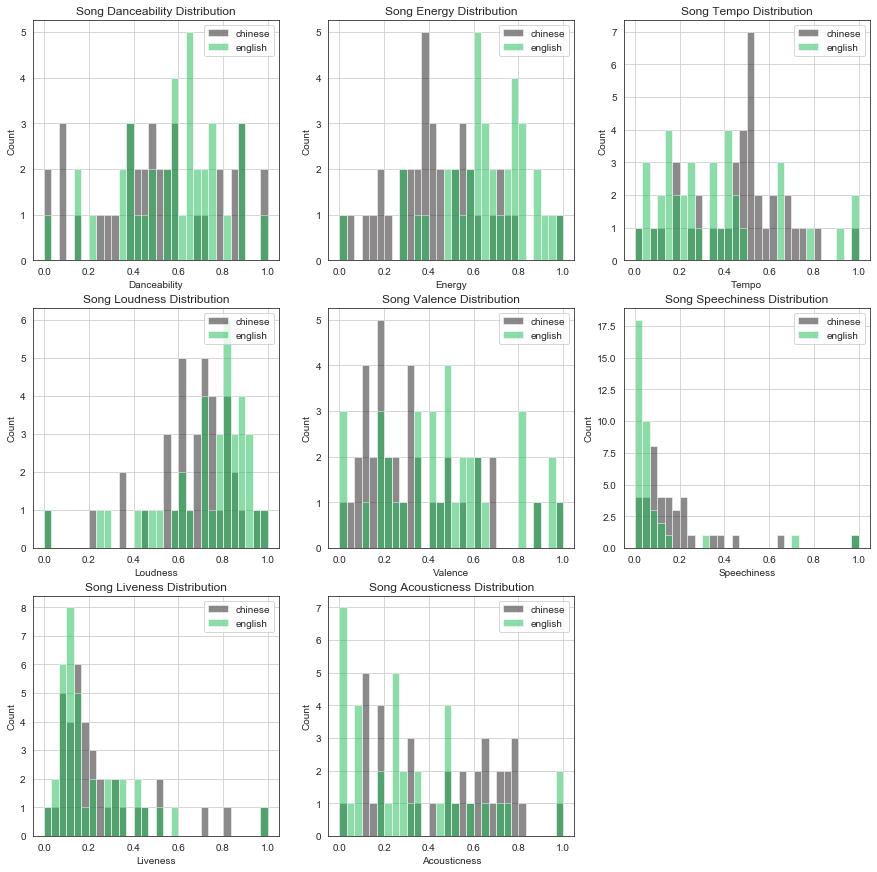

In [95]:
#figure with all columns
fig = plt.figure(figsize=(15,15))

#Danceability
ax1 = fig.add_subplot(331) #3x3 grid location 1
ax1.set_xlabel('Danceability')
ax1.set_ylabel('Count')
ax1.set_title('Song Danceability Distribution')
danceability_chi.hist(alpha = 0.5, bins=30, label='chinese')
ax2 = fig.add_subplot(331)
danceability_eng.hist(alpha = 0.5, bins=30, label='english')
plt.legend(loc="upper right")

#Energy
ax3 = fig.add_subplot(332) #3x3 grid location 1
ax3.set_xlabel('Energy')
ax3.set_ylabel('Count')
ax3.set_title('Song Energy Distribution')
energy_chi.hist(alpha = 0.5, bins=30, label='chinese')
ax4 = fig.add_subplot(332)
energy_eng.hist(alpha = 0.5, bins=30, label='english')
plt.legend(loc="upper right")

#Tempo
ax5 = fig.add_subplot(333) #3x3 grid location 1
ax5.set_xlabel('Tempo')
ax5.set_ylabel('Count')
ax5.set_title('Song Tempo Distribution')
tempo_chi.hist(alpha = 0.5, bins=30, label='chinese')
ax6 = fig.add_subplot(333)
tempo_eng.hist(alpha = 0.5, bins=30, label='english')
plt.legend(loc="upper right")

#Loudness
ax7 = fig.add_subplot(334) #3x3 grid location 1
ax7.set_xlabel('Loudness')
ax7.set_ylabel('Count')
ax7.set_title('Song Loudness Distribution')
loudness_chi.hist(alpha = 0.5, bins=30, label='chinese')
ax8 = fig.add_subplot(334)
loudness_eng.hist(alpha = 0.5, bins=30, label='english')
plt.legend(loc="upper right")

#Valence
ax9 = fig.add_subplot(335) #3x3 grid location 1
ax9.set_xlabel('Valence')
ax9.set_ylabel('Count')
ax9.set_title('Song Valence Distribution')
valence_chi.hist(alpha = 0.5, bins=30, label='chinese')
ax10 = fig.add_subplot(335)
valence_eng.hist(alpha = 0.5, bins=30, label='english')
plt.legend(loc="upper right")

#Speechiness
ax11 = fig.add_subplot(336) #3x3 grid location 1
ax11.set_xlabel('Speechiness')
ax11.set_ylabel('Count')
ax11.set_title('Song Speechiness Distribution')
speechiness_chi.hist(alpha = 0.5, bins=30, label='chinese')
ax12 = fig.add_subplot(336)
speechiness_eng.hist(alpha = 0.5, bins=30, label='english')
plt.legend(loc="upper right")

#Liveness
ax13 = fig.add_subplot(337) #3x3 grid location 1
ax13.set_xlabel('Liveness')
ax13.set_ylabel('Count')
ax13.set_title('Song Liveness Distribution')
liveness_chi.hist(alpha = 0.5, bins=30, label='chinese')
ax14 = fig.add_subplot(337)
liveness_eng.hist(alpha = 0.5, bins=30, label='english')
plt.legend(loc="upper right")

#Acousticness
ax15 = fig.add_subplot(338) #3x3 grid location 1
ax15.set_xlabel('Acousticness')
ax15.set_ylabel('Count')
ax15.set_title('Song Acousticness Distribution')
acousticness_chi.hist(alpha = 0.5, bins=30, label='chinese')
ax16 = fig.add_subplot(338)
acousticness_eng.hist(alpha = 0.5, bins=30, label='english')
plt.legend(loc="upper right")

These histograms of each of the audio features may indicate that my music taste in chinese songs and in English songs are pretty similar in that the within each plot, the shapes of the histograms between Chinese and English songs are pretty similar. The Liveness and Speechiness histograms of both playlists show that most of my songs are at the lower end of liveness. The shape between the distribution of tempo is more dissimilar in that for English songs, tempo is spread across the entire range more uniformly, whereas for Chinese songs, there is an obvious peak on the histogram.

Some observations:

- On average, my songs have:
    - low liveliness
    - low speechiness
    - high loudness
    - low/medium valence
    - relatively low acousticness

## Correlation between Features with Heat Map

### English Songs Features Heat Map

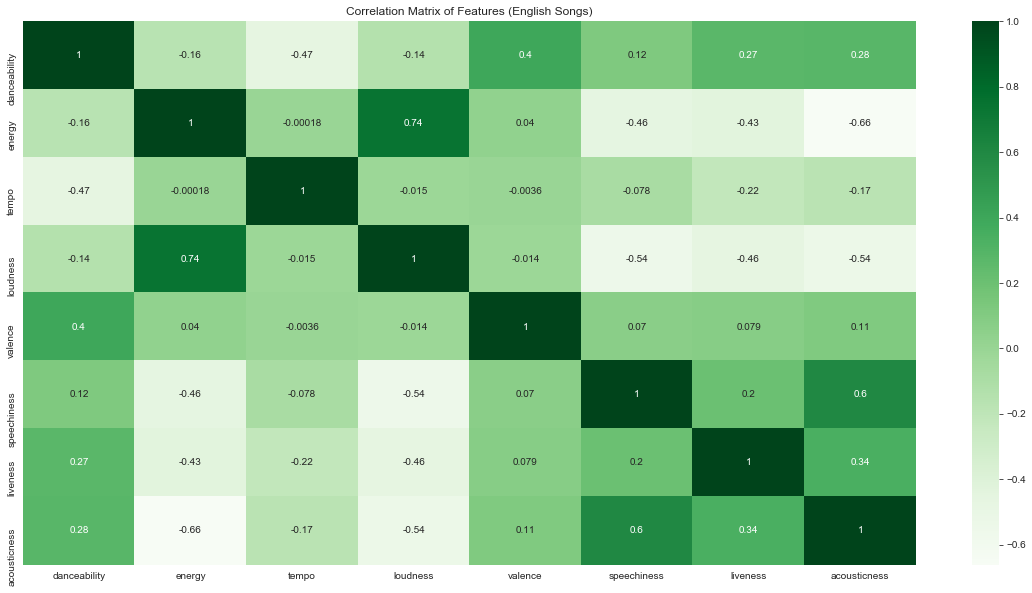

In [23]:
#English Songs
plt.figure(figsize=(20,10))
plt.title("Correlation Matrix of Features (English Songs)")
c = eng.corr()
corr = sns.heatmap(c,cmap="Greens",annot=True)

### Chinese Songs Features Heat Map

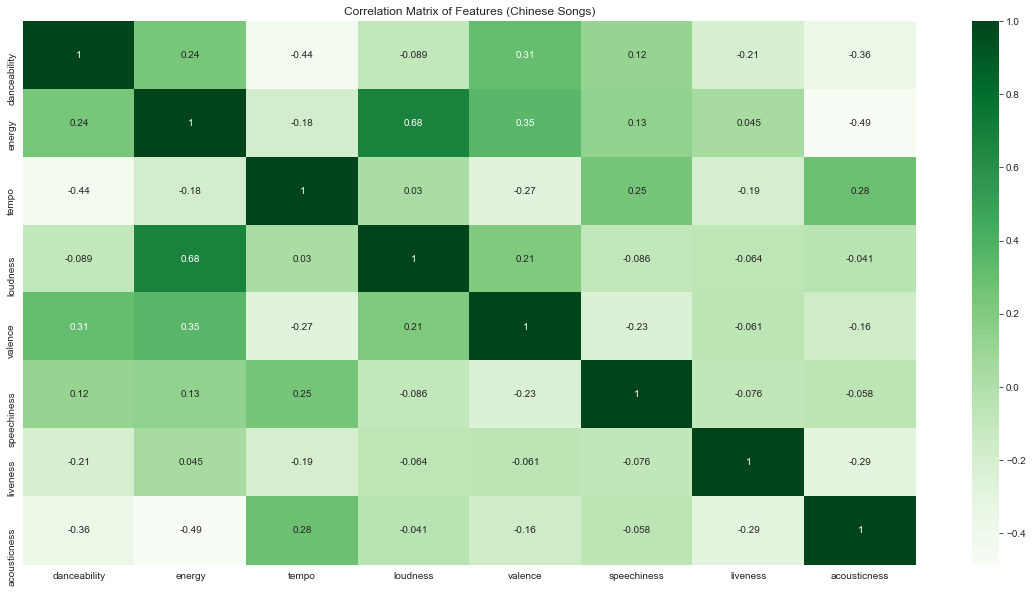

In [24]:
#Chinese Songs
plt.figure(figsize=(20,10))
plt.title("Correlation Matrix of Features (Chinese Songs)")
c = chi.corr()
corr = sns.heatmap(c,cmap="Greens",annot=True)

From both heatmaps, loudness and energy are seen to be highly positively correlated which makes sense because loud music can be highly energetic. On the other hand, accoustiness and energy have a relatively high negative association, which also makes sense.

### Correlation of Features Between Chinese and English Songs

In [79]:
#correlation between the data sets
from scipy.stats import pearsonr

In [80]:
# create a new DataFrame where the values for the indices and columns
# align on the diagonals
c = pd.DataFrame(columns = eng.iloc[:,1:].columns, index = eng.iloc[:,1:].columns)

for col in c.columns:
    for idx in c.index:
        correl_signif = pearsonr(eng.iloc[:,1:][col], chi.iloc[:,1:][idx]) # correlation of those two Series
        correl = correl_signif[0] # grab the actual Pearson R value from the tuple from above
        c.loc[idx, col] = correl  # locate the diagonal for that column and assign the correlation coefficient   

In [78]:
c

,danceability,energy,tempo,loudness,valence,speechiness,liveness,acousticness
danceability,0.020422,-0.0234627,0.142765,0.112412,0.249398,-0.202155,-0.112299,-0.0177431
energy,0.0927598,0.306265,0.0371081,0.15329,0.317693,-0.170479,0.281738,-0.278467
tempo,-0.0271404,0.172937,-0.146788,-0.045581,-0.102626,-0.224665,-0.0108516,-0.140342
loudness,0.0326105,0.219858,0.0321579,0.0321321,0.314576,-0.0776273,0.178,-0.173363
valence,-0.105915,-0.0380541,0.169446,0.0163511,0.162085,-0.0325861,0.140061,-0.025559
speechiness,-0.0197787,0.121151,-0.205951,-0.00353245,-0.0354161,0.0178474,0.325902,0.0499041
liveness,-0.0604799,-0.136555,0.0954172,-0.0184089,-0.250768,-0.00762959,0.283793,0.184771
acousticness,-0.0697289,0.0400595,-0.0822031,0.0518398,0.00503952,0.201674,-0.261357,0.125808


Here I compared the features between the Chinese and English songs. This dataframe shows the correlation of each the features of the Chinese songs and each of the features of the English songs. By looking at the diagonal, you can see the correlation between corresponding feautres are all positive (except for tempo). I was kind of surprised by the negative correlation and also by how low some of the correlations are. But overall, the positive correlations could indicate that my favorite Chinese and English songs are pretty similar.

## Analysis of Audio Feature Means

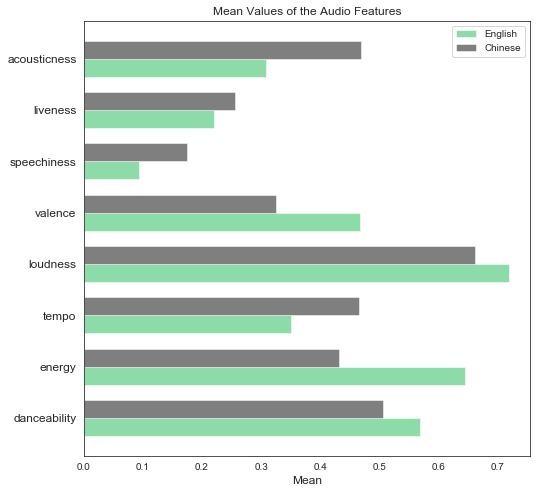

In [98]:
# Number of features
N = len(eng.iloc[:,1:].mean())
# Array with the number of features
num_features = np.arange(N) 

width = 0.35  
#Bar plot with my list
plt.barh(num_features, eng.iloc[:,1:].mean() , width, label='English', color = '#1DB954', alpha = 0.5)
#Bar plot with her list
plt.barh(num_features + width, chi.iloc[:,1:].mean(), width, label='Chinese', color = 'black', alpha = 0.5)

#X- label
plt.xlabel('Mean', fontsize = 12)
# Title
plt.title('Mean Values of the Audio Features')
#Vertical ticks
plt.yticks(num_features + width / 2, (list(chi.iloc[:,1:])[:]), fontsize = 12)
#legend
plt.legend(loc='best')
plt.show()

As expected, the average of the features of both my favorite Chinese and English songs are pretty similar as seen in similarities in the means.

This chart supports what I saw during EDA in that the songs are on average:
- low in liveliness
- low in speechiness
- medium/low valence
- meidum/low acousticness
- high loudness

Some things that surprised me is how high my loudness features are and how low speechiness is.

The ones with the biggest difference in means are:
- energy
- valence
- acousticness

My favorite English songs on average have higher energy and valence, but lower acousticness.


# Standard Deviation of features to see how varied the playlists are

Here, I averaged the standard deviations of audio features for each of the playlists and compared them to show which playlist has a greater variety of songs. I aggregated the standard deviations because it's omre dififcult to compare multiple standard deviations, so having one metric to describe each playlist is more effective.

## English Playlist

In [87]:
#standard deviations of the features
eng_std = eng.iloc[:,1:].std()
eng_std

danceability    0.224916
energy          0.205858
tempo           0.261485
loudness        0.217921
valence         0.268425
speechiness     0.195505
liveness        0.193577
acousticness    0.268802
dtype: float64

In [88]:
#average of the standard deviations
eng_std.mean()

0.2295608969372678

## Chinese Playlist

In [89]:
#standard deviations of the features
chi_std = chi.iloc[:,1:].std()
chi_std

danceability    0.278263
energy          0.215958
tempo           0.210076
loudness        0.196607
valence         0.234418
speechiness     0.192320
liveness        0.222093
acousticness    0.268295
dtype: float64

In [90]:
#average of the standard deviations
chi_std.mean()

0.22725377418487827

## Comparison of how varied my playlists are

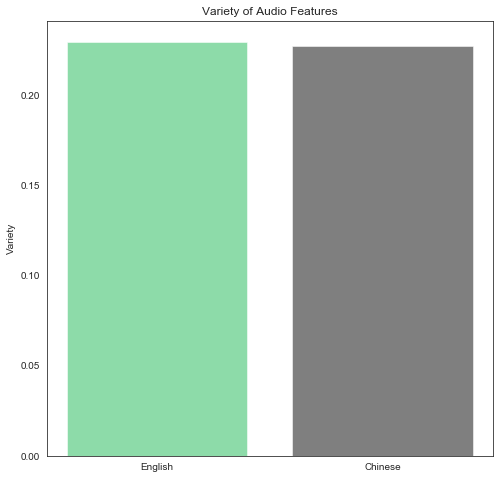

In [91]:
var_data = [eng_std.mean(), chi_std.mean()]
label = ('English','Chinese')
pos = np.arange(len(label))
colors = ['#1DB954', 'black']

plt.bar(pos, var_data, align = 'center', alpha = 0.5, color = colors)
plt.xticks(pos, label)
plt.ylabel('Variety')
plt.title('Variety of Audio Features')
plt.show()

The songs in both my favorite songs seems to have a very similar level of diversity. For the English playlist, it's only slightly higher at around **0.22956** and for the Chinese playlist, it's around **0.22725**. And this level of variety doesn't seem too high to me, which means my favorite songs could be all pretty similar in terms of audio features.

# Conclusion

I expected the songs in both playlist to have similar audio feature levels beacuse I don't think I personally listen to a wide range or variety of music genres, even when in different languages. This is also why I expected that most of the audio features are similar when comparing my favorite English and favorite Chinese Songs. I also believe my favorite types of music can be described as slow pop/pop, ballads, and kind of sad. So, as mentioned at the beginning, I expected my music to be:
- lower in valence (musical positiveness)
- lower in tempo (speed)
- lower in loudness
- lower in energy
- higher in speechiness

From many of the graphs, especially the one about the averages of the audio features, it can be inferred that the two playlists are pretty similar. Their means were relatively close to each other and the from the histogram, it can be seen that the spreads of the audio features were pretty similar when comparing the English and Chinese Songs.

I was correct in that many of my songs weren't high in valence nor tempo because valence measures the positivity of a song, and I like to listen to slower and sadder music. However, the levels of some of the audio features surprised me. I thought my music would be loud and less speechy. Loudness ended up as the feature with the highest mean for both playlists and speechiness had the lowest means. This could be explained by loudness and speechiness both don't necessarily have a very strong correlation with valence as shown on the heat maps (and I based my assumptions on low valence). The correlation of those two features with valence are very low especially for the English songs (<0.08). 

Turns out, I think I was right in that my music taste isn't super diversified beacuse when I calculated the average of the standard deviations of my songs' audio feature, it came out to be around 0.22 which I think is pretty low. It was this amount for both the English and Chinese playlists.

Next time, I would want to try to look at a bigger subset of my music becuase this time I only had 37 songs from each playlist (since I don't listen to as many Chinese songs). Moving forward, I will also try to apply machine learning in my analysis -- perhaps in predicting which playlists a song belongs in or make song recommendations based on playlist of songs.